# Задание 1, 2 

In [2]:
import pandas as pd

In [3]:
BAR = pd.read_csv('brent_prices.csv', sep=';')
RUB = pd.read_csv('dollar_curs.csv', sep=';')
INR = pd.read_csv('indian_curs.csv', sep=';')

#### Вывод данных из ДатаФреймов

In [4]:
BAR.head()

,<TICKER>,<PER>,<DATE>,<OPEN>,<HIGH>,<LOW>,<CLOSE>,<VOL>
0,ICE.BRN,M,20180901,77.69,83.41,75.64,82.98,3141389
1,ICE.BRN,M,20181001,82.97,86.74,74.58,74.59,4406167
2,ICE.BRN,M,20181101,74.69,74.99,57.78,59.07,4333185
3,ICE.BRN,M,20181201,59.98,63.73,50.22,54.15,3459773
4,ICE.BRN,M,20190101,54.12,63.15,52.51,61.22,3659813


In [5]:
RUB.head()

,curs,nominal,date
0,65.854527,1.0,2018-10-01
1,66.355681,1.0,2018-11-01
2,67.335314,1.0,2018-12-01
3,66.512544,1.0,2019-01-01
4,65.810525,1.0,2019-02-01


In [6]:
INR.head()

,curs,nominal,date
0,89.510109,100.0,2018-10-01
1,92.270848,100.0,2018-11-01
2,95.322173,100.0,2018-12-01
3,93.633431,100.0,2019-01-01
4,92.382145,100.0,2019-02-01


#### На данный момент имеем: 
BAR к доллару, Доллар к RUB, 100 Индийских рупий к Рублю. 
Приведём все данные к одной величине

#### 1 рубль - n долларов

In [7]:
RUB['curs'] = 1 / RUB['curs'] 

In [8]:
RUB.head()

,curs,nominal,date
0,0.015185,1.0,2018-10-01
1,0.015070,1.0,2018-11-01
2,0.014851,1.0,2018-12-01
3,0.015035,1.0,2019-01-01
4,0.015195,1.0,2019-02-01


#### 1 рупия - k долларов 
Массивы одинакового размера, поэтому так делать можно

In [9]:
INR['curs'] = INR['curs'] * RUB['curs'] / 100

In [10]:
INR.head()

,curs,nominal,date
0,0.013592,100.0,2018-10-01
1,0.013905,100.0,2018-11-01
2,0.014156,100.0,2018-12-01
3,0.014078,100.0,2019-01-01
4,0.014038,100.0,2019-02-01


#### Соберёмся всё в 1 ДатаФрейм

In [11]:
df = pd.DataFrame({'BAR': BAR['<CLOSE>'], 'RUB': RUB['curs'], 'INR': INR['curs']})

In [12]:
df.head()

,BAR,RUB,INR
0,82.98,0.015185,0.013592
1,74.59,0.015070,0.013905
2,59.07,0.014851,0.014156
3,54.15,0.015035,0.014078
4,61.22,0.015195,0.014038


# Задание 3 

In [22]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

### Построение графиков P-P и Q-Q для переменных BAR, RUB, INR

#### BAR

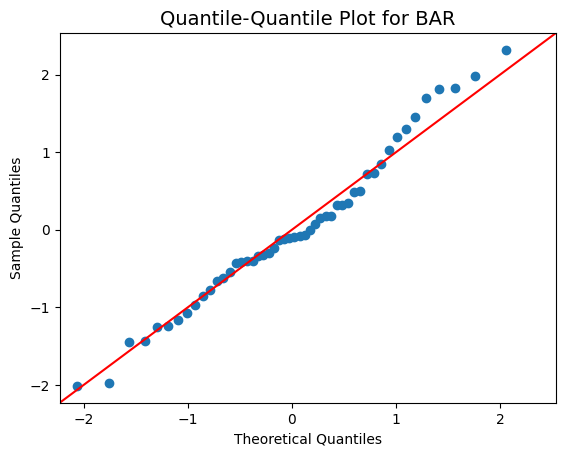

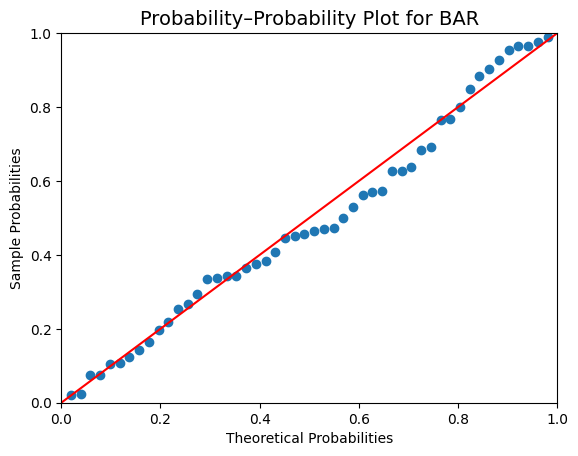

In [26]:
probplot = sm.ProbPlot(df['BAR'])
probplot.qqplot(line = '45')
plt.title('Quantile-Quantile Plot for BAR', fontsize=14)
probplot.ppplot(line = '45')
plt.title('Probability–Probability Plot for BAR', fontsize=14)

plt.show()

#### INR

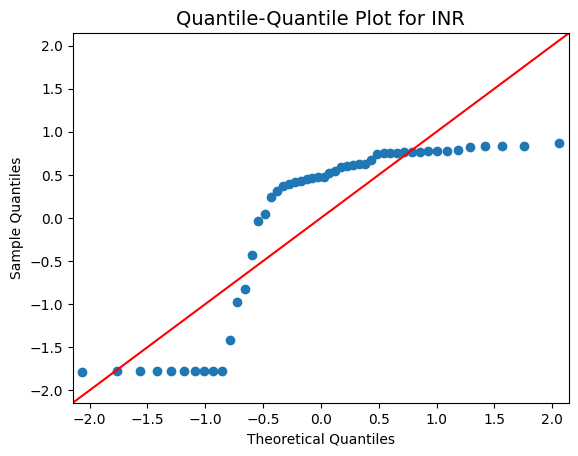

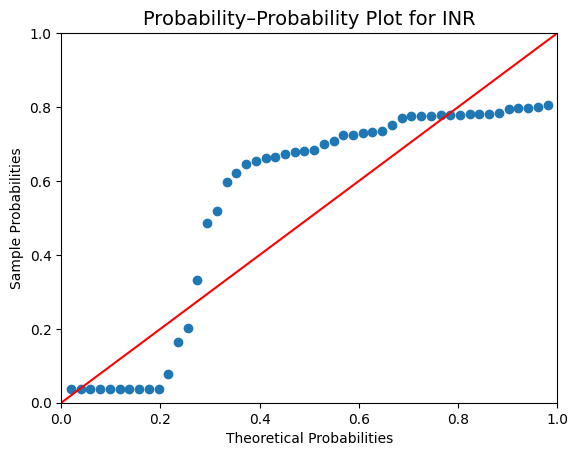

In [27]:
probplot = sm.ProbPlot(df['INR'])
probplot.qqplot(line = '45')
plt.title('Quantile-Quantile Plot for INR', fontsize=14)
probplot.ppplot(line = '45')
plt.title('Probability–Probability Plot for INR', fontsize=14)

plt.show()

#### RUB

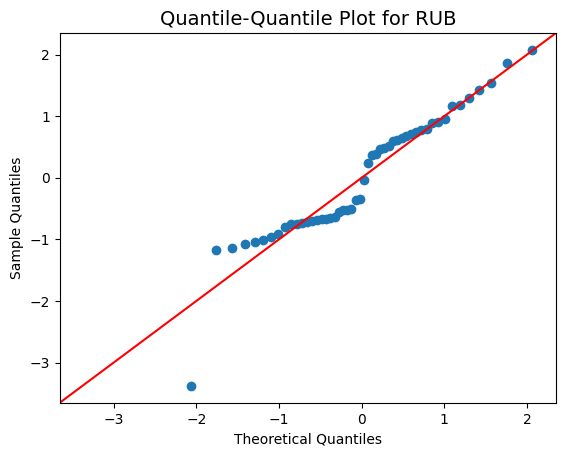

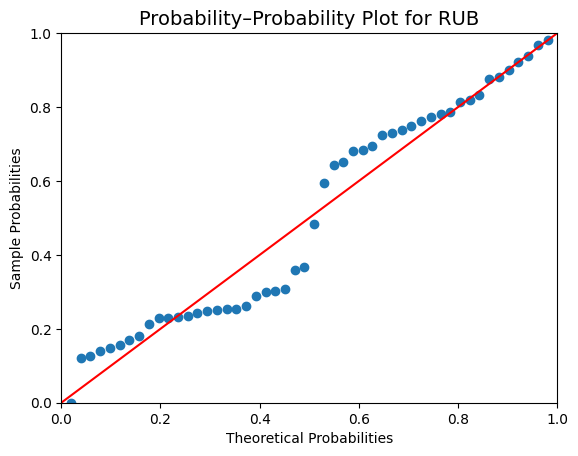

In [28]:
probplot = sm.ProbPlot(df['RUB'])
probplot.qqplot(line = '45')
plt.title('Quantile-Quantile Plot for RUB', fontsize=14)
probplot.ppplot(line = '45')
plt.title('Probability–Probability Plot for RUB', fontsize=14)

plt.show()

### Вывод: требуется стандартизация данных

In [17]:
from sklearn import preprocessing
scaler_std = preprocessing.StandardScaler()
scaler_range = preprocessing.MinMaxScaler()

#### Стандартизация

In [25]:
for i in df.columns:
    df[i] = scaler_std.fit_transform(df[[i]])

#### Нормализация

In [19]:
for i in df.columns:
    df[i] = scaler_range.fit_transform(df[[i]])

In [20]:
df.head()

,BAR,RUB,INR
0,0.631544,0.705527,0.928594
1,0.538683,0.690869,0.952296
2,0.366906,0.662848,0.971267
3,0.312452,0.686327,0.965309
4,0.390703,0.706824,0.962287


In [21]:
df = df.dropna()
df.head()

,BAR,RUB,INR
0,0.631544,0.705527,0.928594
1,0.538683,0.690869,0.952296
2,0.366906,0.662848,0.971267
3,0.312452,0.686327,0.965309
4,0.390703,0.706824,0.962287


# Задание 4

## Нахождение моды, медианы и среднего арифметического 

In [34]:
import statistics as st

In [68]:
def mmm(xxx):
    print("Среднее арифметическое значение столбца ",xxx," равно ",st.mean(df[xxx]))
    print("Медиана столбца ",xxx," равна ",st.median(df[xxx]))
    print("Мода столбца ",xxx," равна ",st.mode(df[xxx]))

In [65]:
def histmmm(xxx):
    fig, ax = plt.subplots()
    ax.vlines(st.mean(df[xxx]), 0, df[xxx].size, colors="Red", label="mean")
    ax.vlines(st.median(df[xxx]), 0, df[xxx].size, colors="Green", label="median")
    ax.vlines(st.mode(df[xxx]), 0, df[xxx].size, colors="Purple", label="mode")
    df[xxx].plot.hist()
    plt.title(f'Data Set Histogram for {xxx}', fontsize=14)
    plt.legend(title="Parameters:")
    plt.show()

## Проверка для моды вручную:

In [66]:
def check_moda(xxx):
# Создаём пустой словарь, в котором будем считать количество появлений цен
    counts = {}
    for p in df[xxx]:
        if p not in counts:
            counts[p] = 1
        else:  
            counts[p] += 1

# df_count_BAR = pd.DataFrame({'BAR': BAR_counts})
# print(df_count_BAR)
# Проходимся по словарю и ищем максимальное количество повторений
    maxp = 0
    mode_price = None
    for k, v in counts.items():
        if maxp < v:
            maxp = v
            mode_price = k
    print("Мода вручную равна ",mode_price, maxp) 

## Нахождение средних значений и построение гистограммы:

### BAR

Среднее арифметическое значение столбца  BAR  равно  -0.07849267044521271
Медиана столбца  BAR  равна  -0.1154383432723021
Мода столбца  BAR  равна  0.7225830295606483
Мода столбца  BAR  равна  [0.7225830295606483, 0.3202368597140987, -0.4240316213369676, -0.6599724027010944, -0.320927418098579, -0.07827287466311518, -0.00346238301107505, 0.1797274106496897, -0.2950314786805652, -0.10944391285146554, -0.13725807000414722, -0.41827696813296456, -0.40676766172495843, -0.40341078068929004, -0.34442558534825846, -0.0902617355047883, -0.5396042398506966, -0.8546715027698651, -2.013754568942821, -1.9782675408514687, -1.4354119219405106, -1.2603745536520832, -1.160627231449363, -1.071430106787315, -1.2368763864024042, -1.4411665751445137, -0.9736010023192627, -0.7765041300821569, -0.6235262657424082, -0.12143277369313865, -0.2322098478701979, -0.07060000372444476, 0.07422543524296625, 0.3240732951834339, 0.35044878903511456, 0.1816456283843578, 0.5010288812065289, 0.7355309992696548, 0.155270

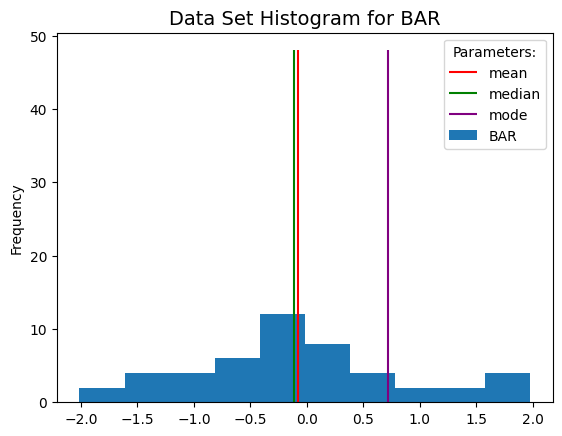

In [67]:
mmm('BAR')
check_moda('BAR')
histmmm('BAR')

### RUB

Среднее арифметическое значение столбца  RUB  равно  -1.5890067039947552e-16
Медиана столбца  RUB  равна  -0.19009924897407138
Мода столбца  RUB  равна  0.46903525754915465
Мода вручную равна  0.46903525754915465 1


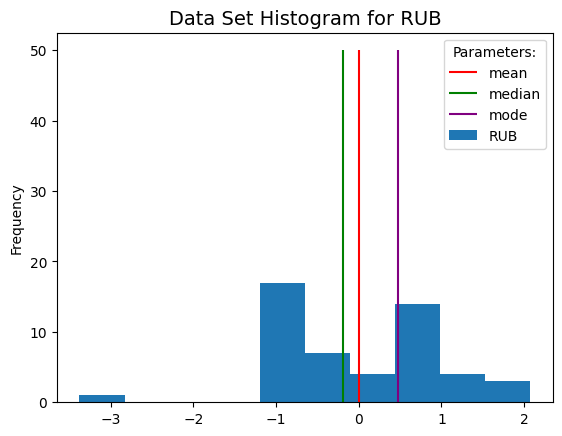

In [39]:
mmm('RUB')
check_moda('RUB')
histmmm('RUB')

### INR

Среднее арифметическое значение столбца  INR  равно  -1.9734214262712158e-16
Медиана столбца  INR  равна  0.4743794278918051
Мода столбца  INR  равна  0.6749067583716407
Мода вручную равна  0.6749067583716407 1


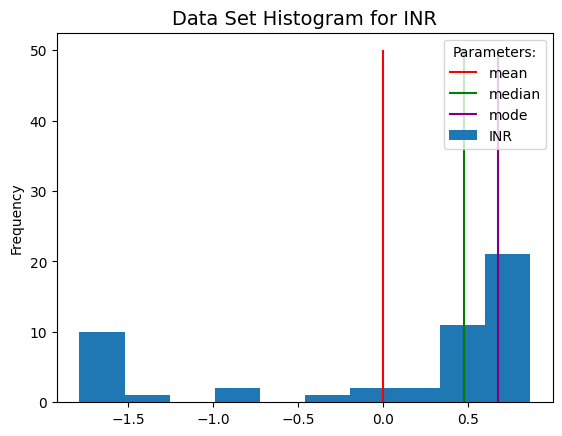

In [40]:
mmm('INR')
check_moda('INR')
histmmm('INR')

### Приблизительное равенство моды и среднего арифметического значения с медианой выполняется, поскольку данное распределение нормализовано

# Задание 5

### Поскольку у нас 49 наблюдений, то воспользуемся критерием Шапиро-Уилка (7-2000 наблюдений)

In [41]:
from scipy import stats

### Критерий Шапиро-Уилка

### BAR

In [42]:
w = stats.shapiro(list(df['BAR']))
print(w)

ShapiroResult(statistic=0.9777415990829468, pvalue=0.4611488878726959)


#### Выбираем уровень значимости 5% (0.05), 
#### Поскольку p-value > 0.05, то гипотеза (распределение нормальное) принимается.

### RUB

In [43]:
w = stats.shapiro(list(df['RUB']))
print(w)

ShapiroResult(statistic=0.9334864020347595, pvalue=0.007505691144615412)


#### Выбираем уровень значимости 5% (0.05), 
#### Поскольку p-value < 0.05, то гипотеза (распределение нормальное) отвергается.

### INR

In [44]:
w = stats.shapiro(list(df['INR']))
print(w)

ShapiroResult(statistic=0.7235109210014343, pvalue=2.2425469481390792e-08)


#### Выбираем уровень значимости 5% (0.05), 
#### Поскольку p-value < 0.05, то гипотеза (распределение нормальное) отклоняется.

### Получается, нормальное распределение не выполняется для RUB и INR.

# Задание 6

## Удаление наиболее заметных выбросов (используя межквартильный диапазон)

In [45]:
Q1 = df.quantile(q=.25)
Q3 = df.quantile(q=.75)
IQR = df.apply(stats.iqr)
#only keep rows in dataframe that have values within 1.5\*IQR of Q1 and Q3
df = df[~((df < (Q1-1.5*IQR)) | (df > (Q3+1.5*IQR))).any(axis=1)]

#find how many rows are left in the dataframe 
df.shape

(48, 3)

### RUB
#### Получили 48 наблюдений, снова воспользуемся критерием Шапиро-Уилка (7-2000 наблюдений)

In [46]:
w = stats.shapiro(list(df['RUB']))
print(w)

ShapiroResult(statistic=0.9164904952049255, pvalue=0.002240788424387574)


#### Выбираем уровень значимости 5% (0.05), 
#### Поскольку p-value < 0.05, то гипотеза (распределение нормальное) отвергается.
#### Это связано с обработкой данных. Поскольку в некоторых месяцах за 1 число не было значений курса доллара к рублю, поэтому было посчитано среднее значение в каждом месяце 

#### Графическая проверка квартилями

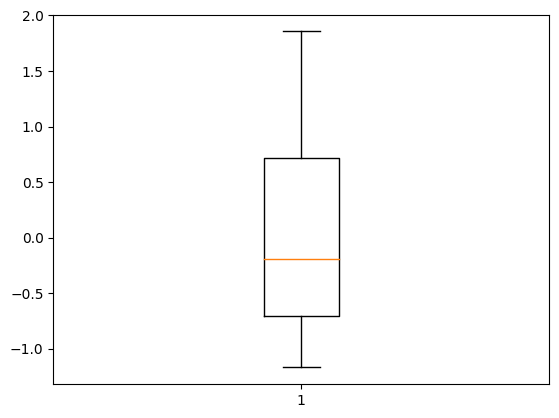

In [47]:
plt.boxplot(df['RUB'].values)
plt.show()

### INR

In [48]:
w = stats.shapiro(list(df['INR']))
print(w)

ShapiroResult(statistic=0.722226619720459, pvalue=3.3501311946793066e-08)


#### Выбираем уровень значимости 5% (0.05), 
#### Поскольку p-value < 0.05, то гипотеза (распределение нормальное) отвергается.

#### Графическая проверка квартилями

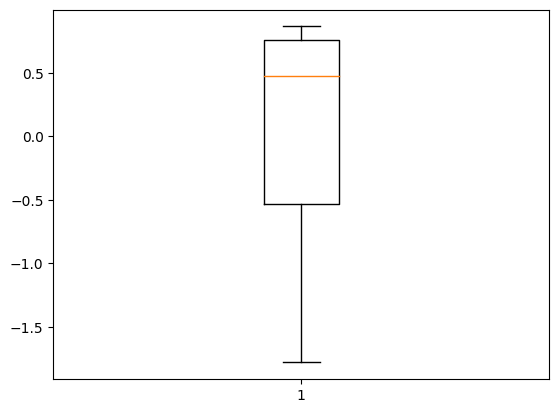

In [49]:
plt.boxplot(df['INR'].values)
plt.show()

# Задание 7

## Графики взаимной корреляции

In [50]:
import numpy as np 

In [51]:
def covmatr(x,y):
    cvm = df[[x, y]].cov()
    print("Ковариационная матрица:")
    print(cvm)

In [52]:
def covgraph(x,y):
    pd.DataFrame(np.array([df[x],df[y]]).T).plot.scatter(0, 1, grid=True)
    plt.xlabel(x)
    plt.ylabel(y)
    plt.show()

### RUB - INR

Ковариационная матрица:
          RUB       INR
RUB  0.728833  0.590150
INR  0.590150  0.989268


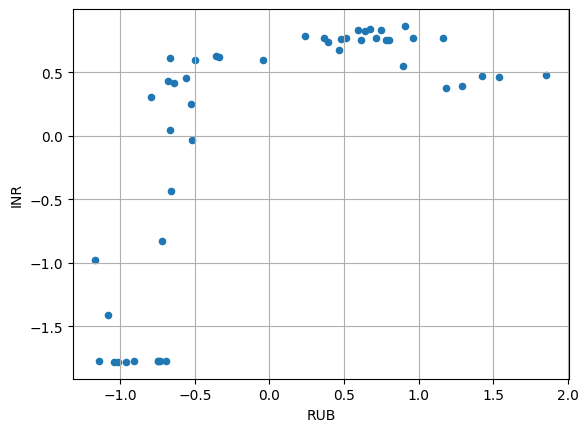

In [53]:
covmatr('RUB', 'INR')
covgraph('RUB','INR')

### RUB - BAR

Ковариационная матрица:
          RUB       BAR
RUB  0.728833  0.334050
BAR  0.334050  0.898466


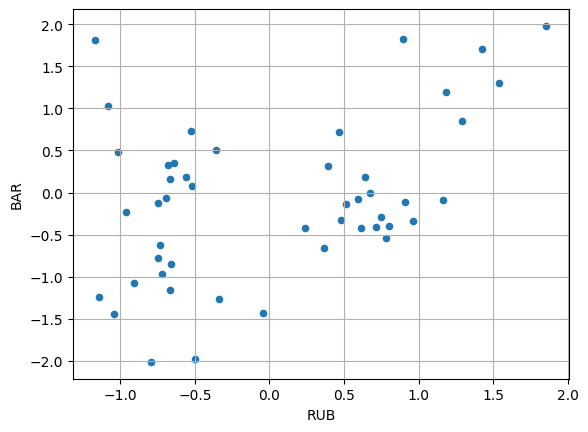

In [54]:
covmatr('RUB', 'BAR')
covgraph('RUB','BAR')

### INR - BAR

Ковариационная матрица:
          INR       BAR
INR  0.989268  0.133835
BAR  0.133835  0.898466


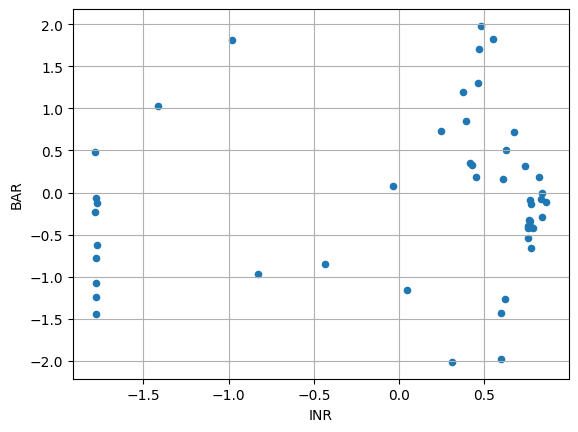

In [55]:
covmatr('INR', 'BAR')
covgraph('INR','BAR')

# Задание 8

## Оценки с помощью методов

In [56]:
print(df.count)

<bound method DataFrame.count of          BAR       RUB       INR
0   0.722583  0.469035  0.674907
1   0.320237  0.389128  0.737750
2  -0.424032  0.236362  0.788051
3  -0.659972  0.364364  0.772253
4  -0.320927  0.476109  0.764239
5  -0.078273  0.592936  0.832554
6  -0.003462  0.673985  0.837225
7   0.179727  0.638111  0.821529
8  -0.295031  0.746938  0.835952
9  -0.109444  0.909472  0.864231
10 -0.137258  0.512114  0.771592
11 -0.418277  0.614944  0.756613
12 -0.406768  0.712202  0.772396
13 -0.403411  0.798270  0.754729
14 -0.344426  0.960282  0.766129
15 -0.090262  1.160961  0.766654
16 -0.539604  0.779065  0.754718
17 -0.854672 -0.659741 -0.431643
18 -2.013755 -0.791734  0.308361
19 -1.978268 -0.500808  0.599211
20 -1.435412 -0.041989  0.596485
21 -1.260375 -0.338210  0.623228
22 -1.160627 -0.669816  0.045541
23 -1.071430 -0.910424 -1.777812
24 -1.236876 -1.139730 -1.777871
25 -1.441167 -1.043514 -1.780479
26 -0.973601 -0.723068 -0.830520
27 -0.776504 -0.745249 -1.776318
28 -0.6235

## Подготовка значений

In [57]:
np.isinf(df['RUB']).any()
np.isinf(df['INR']).any()
np.isinf(df['BAR']).any()

False

In [58]:
df['RUB'] = np.nan_to_num(df['RUB'])
df['INR'] = np.nan_to_num(df['INR'])
df['BAR'] = np.nan_to_num(df['BAR'])
df.head()

,BAR,RUB,INR
0,0.722583,0.469035,0.674907
1,0.320237,0.389128,0.737750
2,-0.424032,0.236362,0.788051
3,-0.659972,0.364364,0.772253
4,-0.320927,0.476109,0.764239


## Методы корреляции

In [59]:
def psk(x,y):
    print("PearsonResult",stats.pearsonr(df[x], df[y]))
    print(stats.spearmanr(df[x], df[y]))
    print(stats.kendalltau(df[x], df[y]))

#### Поскольку распределение данных у нас нормальное и мы исследуем на линейную зависимость, то в нашем случае лучше ориентироваться на метод корреляции Пирсона.

### RUB - INR

In [60]:
psk('RUB','INR')

PearsonResult (0.6950110284927344, 4.2315335857183204e-08)
SpearmanrResult(correlation=0.7162396873643074, pvalue=1.04257229379651e-08)
KendalltauResult(correlation=0.5372340425531915, pvalue=7.198191216628563e-08)


#### Поскольку значение p-value очень мало, то гипотеза об отсутствии корреляции должна быть отброшена. Значения критериев говорят о наличии прямой корреляции.
#### Поскольку абсолютное значение уровня корреляции по критерию Пирсона приблизительно равно 0.7 (от 0.7 до 0.9), то следует сделать вывод о высокой тесноте (силе) корреляционной связи

### RUB - BAR

In [79]:
psk('RUB','BAR')

(0.4128061452166959, 0.0035468147016428685)
SpearmanrResult(correlation=0.3297872340425532, pvalue=0.022075958156628158)
KendalltauResult(correlation=0.24290780141843976, pvalue=0.014878499379466283)


#### Поскольку значение p-value < 5% (0.05), то гипотеза об отсутствии корреляции должна быть отброшена. Значения критериев говорят о наличии прямой корреляции.
#### Поскольку абсолютное значение уровня корреляции по критерию Пирсона равно 0.4 (от 0.3 до 0.5), то следует сделать вывод об умеренной тесноте (силе) корреляционной связи

### BAR - INR

In [80]:
psk('BAR','INR')

(0.14195835270054985, 0.335810011851613)
SpearmanrResult(correlation=0.037234042553191495, pvalue=0.8016191245348037)
KendalltauResult(correlation=0.03191489361702128, pvalue=0.7489914872073479)


#### Поскольку значение p-value > 5% (0.05) по всем критериям, то гипотеза об отсутствии корреляции должна быть принята.

# Задание 9

## Построение линейной регрессии

In [29]:
from sklearn import datasets, linear_model
regr = linear_model.LinearRegression()

In [30]:
def linregr(x,y):
    regr.fit(df[x].values.reshape(-1,1), df[y].values)
    y_pred = regr.predict(df[x].values.reshape(-1,1))
    plt.plot(df[x].values, y_pred, color = 'red')
    plt.scatter(df[x].values, df[y].values)
    plt.xlabel(x)
    plt.ylabel(y)
    plt.title(f'Linear Regression for {x} and {y}', fontsize=14)
    plt.show()

### RUB-INR

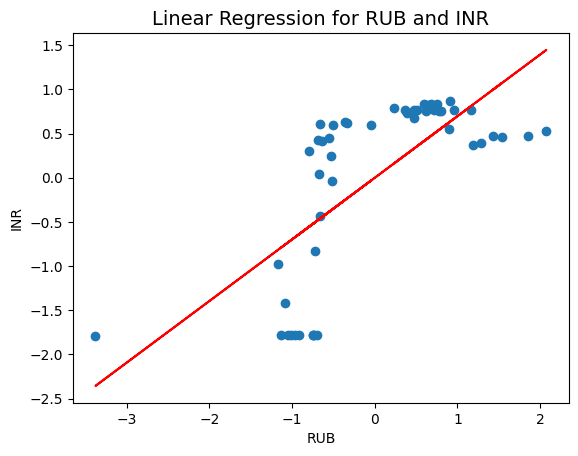

In [31]:
linregr('RUB','INR')

### RUB-BAR

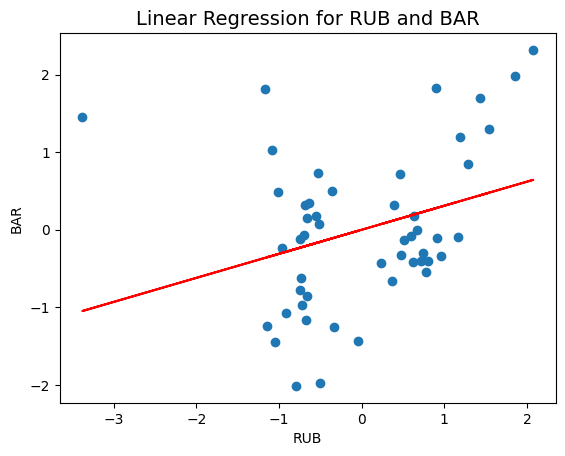

In [32]:
linregr('RUB','BAR')

### BAR-INR

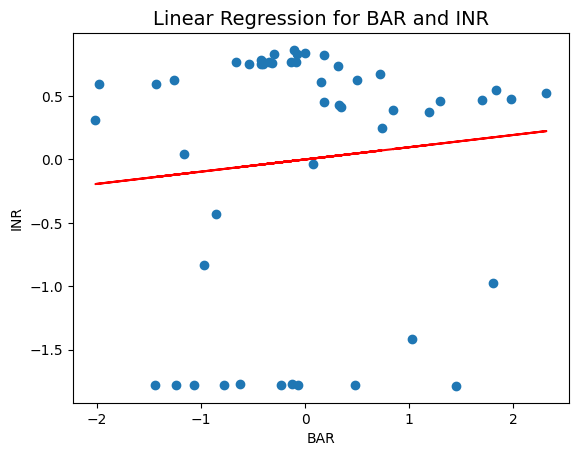

In [33]:
linregr('BAR','INR')